<h4>Bu "Notebook"-da sizdən tələb olunan aparılmış ekonometrik təhlilin nəticələrinə baxaraq onları anlamaq və izah etməkdir. </h4>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

In [18]:
macro = sm.datasets.macrodata.load_pandas()
macro = macro.data
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<h4> Klassik Filips əyrisi</h4>
<img src="https://www.economicsdiscussion.net/wp-content/uploads/2015/04/clip_image00235.jpg">

Klassik Filips əyrisinə əsasən inflyasiya və işsizlik dərəcəsi arasında sabit, mənfi (əks) əlaqə vardır. Bunu yoxlamaq üçün bizə yuxarıda verilmiş ABŞ-ın 1959-2009-cu illəri əhatə edən rüblük statistik göstəricilərindəki infl(inflyasiya) və unemp(işsizlik dərəcəsi) dəyişənlərindən istifadə edəcəyik. Ekonometrik təhlil həyata keçirərkən, demək olar, həmişə birinci etməli olduğumuz bizə verilən məlumatı qrafiki olaraq təsvir etməkdir

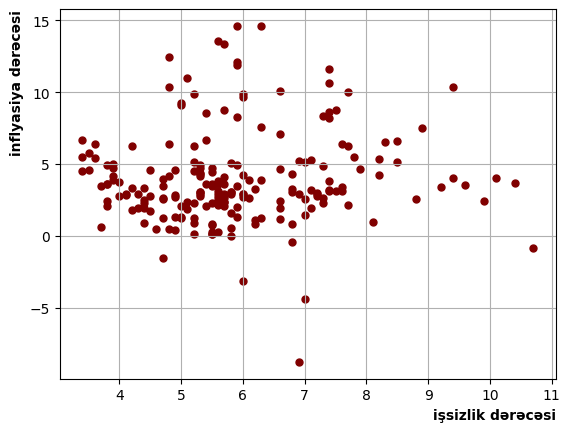

In [19]:
plt.scatter(x=macro.unemp, y=macro.infl, c='maroon', s=25)
plt.xlabel("işsizlik dərəcəsi", loc="right", fontdict={"weight": "bold"})
plt.ylabel("inflyasiya dərəcəsi",loc='top',fontdict={"weight": "bold"})
plt.grid(visible=True)

Qrafikə baxdıqda data nöqtələrindən hərhansı düz xəttin keçirilməsinin çox yüksək nəticə verməyəcəyi və xətti olmayan tənliyin qurulmasına, yaxud da verilənlərin "Box-Cox" və ya bu kimi başqa üsullarla çevrilməsinə ehtiyac olduğu görünür. Bununla belə qrafiki gördüyümüz əlaqələrin yoxlanması üçün gəlin <b style="font-size: 20px;">Ən Kiçik Kvadratlar Üsulu</b> ilə dəyişənlər arasında reqressiya tənliyimizi həll etməyə çalışaq. 

In [31]:
model = sm.OLS(macro.infl, macro.unemp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   infl   R-squared (uncentered):                   0.579
Model:                            OLS   Adj. R-squared (uncentered):              0.577
Method:                 Least Squares   F-statistic:                              277.7
Date:                Sat, 17 Feb 2024   Prob (F-statistic):                    8.53e-40
Time:                        15:44:52   Log-Likelihood:                         -531.83
No. Observations:                 203   AIC:                                      1066.
Df Residuals:                     202   BIC:                                      1069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
unemp          0.6427      0.039     16.663      0.000       0.567       0.719
==============================================================================
Omnibus:                       23.894   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.655
Skew:                           0.544   Prob(JB):                     6.07e-12
Kurtosis:                       5.219   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Qauss-Markov müddəalarından biri reqressiyanın qalıqları arasında korrelyasiyanın olmamasıdır ki, bunu da Durbin-Uotson testi vasitəsilə yoxlamaq olar. Testin 0 ilə 4 arasında dəyişdiyini və 2-in avtokorrelyasiyanın olmaması, 0-2 arası müsbət, 2-4 arası mənfi avtokorrelyasiya mənasına gəldiyini nəzərə alsaq, bizim hesablamamızdakı 0.695 test nəticəsinin müsbət avtokorrelyasiyaya işarə vurması deməkdir. Bunu qrafik olaraq yoxlamaq olar.

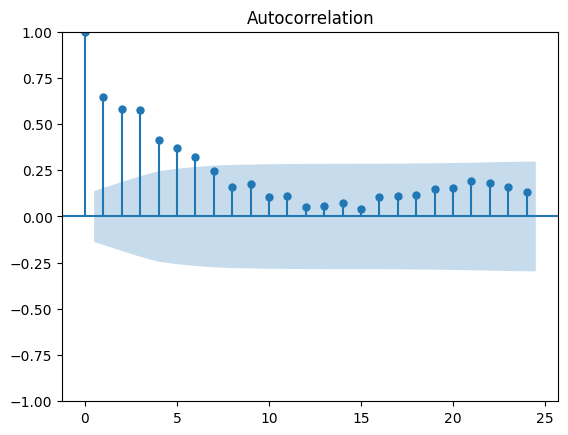

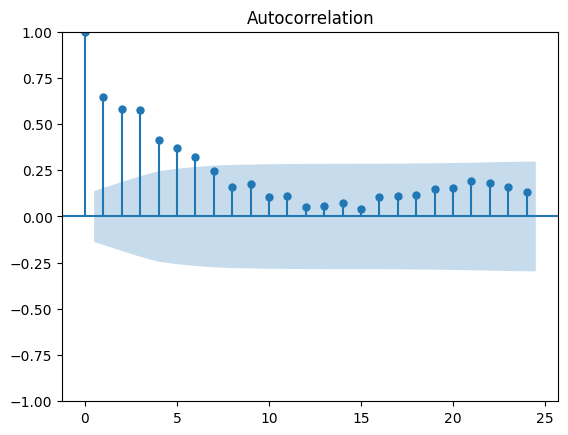

In [33]:
sm.tsa.graphics.plot_acf(model.resid[0:])

Qrafikdən göründüyü kimi qalıqda altıncı dərəcədən avtokorrelyasiya vardır. Bu isə o deməkdir ki, Sadə Ən Kiçik Kvadratlar üsulundan istifadə edərək dəyişənlər arasındakı əlaqənin tapılması etibarlı nəticələr verməyəcəkdir. 